<a href="https://colab.research.google.com/github/jeochris/DL-Lecture-Study/blob/main/Demo3_TensorFlow_MNIST_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image recognition with standard NN, not using CNN case

## Loading MNIST training data

In [1]:
import tensorflow as tf 
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# import MNIST data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Scale
x_train = x_train/255.0
x_test = x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


## Training Images
![mnist.train.xs](https://www.tensorflow.org/versions/master/images/mnist-train-xs.png)

In [2]:
# check MNIST training images matrix shape
# 60000 samples of 28*28 pixels
x_train.shape

(60000, 28, 28)

In [3]:
# check MNIST training images matrix data
# 0 if all white pixel
sample_img = x_train[1]
sample_img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

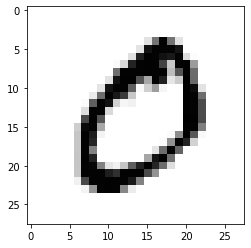

In [4]:
# plot the image
plt.imshow(sample_img).set_cmap('Greys')

## Training Labels
![mnist.train.ys](https://www.tensorflow.org/versions/master/images/mnist-train-ys.png)

In [8]:
# check MNIST labels shape
# output data - for 60000 samples, 0~9
y_train.shape

(60000,)

In [9]:
# show MNIST label data
sample_label = y_train[1] # corresponds to [4]
sample_label

0

# Building Training Model: Defining a Neural Network

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # flatten intput dimension 28*28 into one long vector (square into a line) 
    keras.layers.Dense(10, activation='softmax')
])
# no hidden layer case - just input and output

## Use Gradient Decent to find the optimal weights
![](http://blog.datumbox.com/wp-content/uploads/2013/10/gradient-descent.png)
From: [Machine Learning Blog & Software Development News](http://blog.datumbox.com/tuning-the-learning-rate-in-gradient-descent/)

# Compile Model

In [11]:
model.compile(optimizer='sgd', # set gradient descent method
              loss='sparse_categorical_crossentropy', # set error function
              metrics=['accuracy'])

In [12]:
model.summary()
# 7850 = (784+1)*10 weight parameter (arrows) (1: bias)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


# Do 1000 times of mini-batch training

In [13]:
# train the model mini batch with 100 elements, for 1K times
model.fit(x_train, y_train, epochs=10, batch_size = 100)
# loss function decrease, classification accuracy increase

Epoch 1/10
600/600 [==============================] - 2s 2ms/step - loss: 1.1636 - accuracy: 0.7308
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.6487 - accuracy: 0.8515
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.5402 - accuracy: 0.8666
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4879 - accuracy: 0.8756
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4561 - accuracy: 0.8811
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4340 - accuracy: 0.8852
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4176 - accuracy: 0.8885
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.4047 - accuracy: 0.8911
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3943 - accuracy: 0.8936
Epoch 10/10
600/600 [==============================] - 1s 2ms/step - loss: 0.3857 - accuracy: 0.8956

# Test Accuracy

In [14]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)
# 90% - CNN will be better, but we can still use standard NN by flattening image

313/313 - 0s - loss: 0.3626 - accuracy: 0.9043

Accuracy: 0.9042999744415283






# Visualizing with TensorBoard

See [TensorBoard tutorial](https://www.tensorflow.org/versions/master/how_tos/summaries_and_tensorboard/index.html) for details.

![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)